In [1]:
import matplotlib.pyplot as pl
import numpy as np
import ot
import os
import pandas as pd


In [3]:
atlas_switch ='Glasser' ## 'Glasser' 'Schaefer1000'
type_switch = 'ses-01'
collated_results = {}
for alpha in [0.01, 0.1, 0.5, 1.0]:
    collated_results[alpha] = pd.read_csv(f'/Users/tiyu/LoGML/matching_graphs_spatial_constraints/results/results_fugw/fgw_results_Glasser_ses-01_{alpha}.csv')

In [4]:
collated_results

{0.01:        subject  frobenius_quality      self  neighbors    others
 0   sub-111716           1.011581  0.958101   0.005587  0.036313
 1   sub-103818           0.995277  0.913408   0.019553  0.067039
 2   sub-105115           1.000116  0.944134   0.008380  0.047486
 3   sub-113619           0.996738  0.930168   0.013966  0.055866
 4   sub-115320           1.010135  0.924581   0.011173  0.064246
 ..         ...                ...       ...        ...       ...
 95  sub-108020           1.014858  0.958101   0.002793  0.039106
 96  sub-112112           0.999769  0.960894   0.000000  0.039106
 97  sub-102513           0.996660  0.963687   0.002793  0.033520
 98  sub-112920           1.008551  0.946927   0.005587  0.047486
 99  sub-119732           0.996495  0.902235   0.013966  0.083799
 
 [100 rows x 5 columns],
 0.1:        subject  frobenius_quality      self  neighbors    others
 0   sub-111716           0.945083  0.888268   0.081006  0.030726
 1   sub-103818           0.994907  0.

In [14]:
# import seaborn as sns
# import pandas as pd
# import matplotlib.pyplot as plt

# def combine_dataframes(data_dict):
#     """
#     Combine dataframes from the dictionary into a single dataframe for plotting.
#     """
#     combined_df = pd.concat({k: v for k, v in data_dict.items()}, names=['alpha'])
#     combined_df.reset_index(level=0, inplace=True)
#     return combined_df



# def plot_boxplots_by_alpha(data_dict, attributes):
#     """
#     Plot boxplots for each attribute within the same alpha value using seaborn.
    
#     Parameters:
#     data_dict (dict): A dictionary with alpha values as keys and dataframes as values.
#     attributes (list): A list of attribute names to plot.
#     """
#     for alpha, df in data_dict.items():
#         plt.figure(figsize=(12, 8))
#         for attribute in attributes:
#             sns.boxplot(data=df[attributes])
#             plt.title(f'Boxplot of attributes for alpha = {alpha}')
#             plt.xlabel('Attributes')
#             plt.ylabel('Values')
#         plt.show()

# # Example usage

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def combine_dataframes(data_dict):
    """
    Combine dataframes from the dictionary into a single dataframe for plotting.
    """
    combined_df = pd.concat(data_dict, names=['alpha']).reset_index(level=0)
    return combined_df

def plot_boxplots_by_attribute(data_dict, attributes):
    """
    Plot boxplots for each attribute across different alpha values using seaborn.
    
    Parameters:
    data_dict (dict): A dictionary with alpha values as keys and dataframes as values.
    attributes (list): A list of attribute names to plot.
    """
    combined_df = combine_dataframes(data_dict)
    
    for attribute in attributes:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='alpha', y=attribute, data=combined_df, palette='Set2')
        plt.title(f'Boxplot of {attribute} for different alpha values')
        plt.xlabel('Alpha')
        plt.ylabel(attribute)
        plt.show()
# data_dict = {0.01: df1, 0.1: df2, ...}  # Your dictionary of dataframes
# attributes = ['frobenius_quality', 'self', 'neighbors', 'others']
# plot_boxplots_by_alpha(data_dict, attributes)



In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def combine_dataframes(data_dict):
    """
    Combine dataframes from the dictionary into a single dataframe for plotting.
    """
    combined_df = pd.concat(data_dict, names=['alpha']).reset_index(level=0)
    return combined_df

def plot_boxplots_and_stats(data_dict, attributes):
    """
    Plot boxplots for each attribute across different alpha values using seaborn,
    and also plot the mean and std deviation as heatmaps.
    
    Parameters:
    data_dict (dict): A dictionary with alpha values as keys and dataframes as values.
    attributes (list): A list of attribute names to plot.
    """
    combined_df = combine_dataframes(data_dict)
    
    # Create empty dataframes to hold the mean and std values
    mean_df = pd.DataFrame(index=data_dict.keys(), columns=attributes)
    std_df = pd.DataFrame(index=data_dict.keys(), columns=attributes)
    title_dict = {'frobenius_quality': 'Frobenius Ratio', 'self': 'No Permutation', 'neighbors': 'Neighbor Permutation', 'others': 'Other Permutation'}
    # Calculate mean and std for each attribute across different alpha values
    for alpha, df in data_dict.items():
        for attribute in attributes:
            mean_df.loc[alpha, attribute] = df[attribute].mean()
            std_df.loc[alpha, attribute] = df[attribute].std()
    
    # Plot boxplots for each attribute across different alpha values
    for attribute in attributes:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='alpha', y=attribute, data=combined_df, palette='Set2')
        plt.title(f'Boxplot of {title_dict[attribute]}')
        plt.xlabel('Alpha', fontdict={'fontsize': 14})
        plt.ylabel(title_dict[attribute])
        plt.show()
    
    # Plot the mean and std as heatmaps
    plt.figure(figsize=(12, 8))
    sns.heatmap(mean_df.astype(float), annot=True, fmt=".2f", cmap='viridis')
    plt.title('Mean values for each attribute across different alpha values')
    plt.xlabel('Attributes')
    plt.ylabel('Alpha')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(std_df.astype(float), annot=True, fmt=".2f", cmap='viridis')
    plt.title('Standard Deviation values for each attribute across different alpha values')
    plt.xlabel('Attributes')
    plt.ylabel('Alpha')
    plt.show()

/var/folders/5_/8w_rvszs7q3_4ll2x7w6mrl80000gp/T/ipykernel_98602/141410722.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alpha', y=attribute, data=combined_df, palette='Set2')


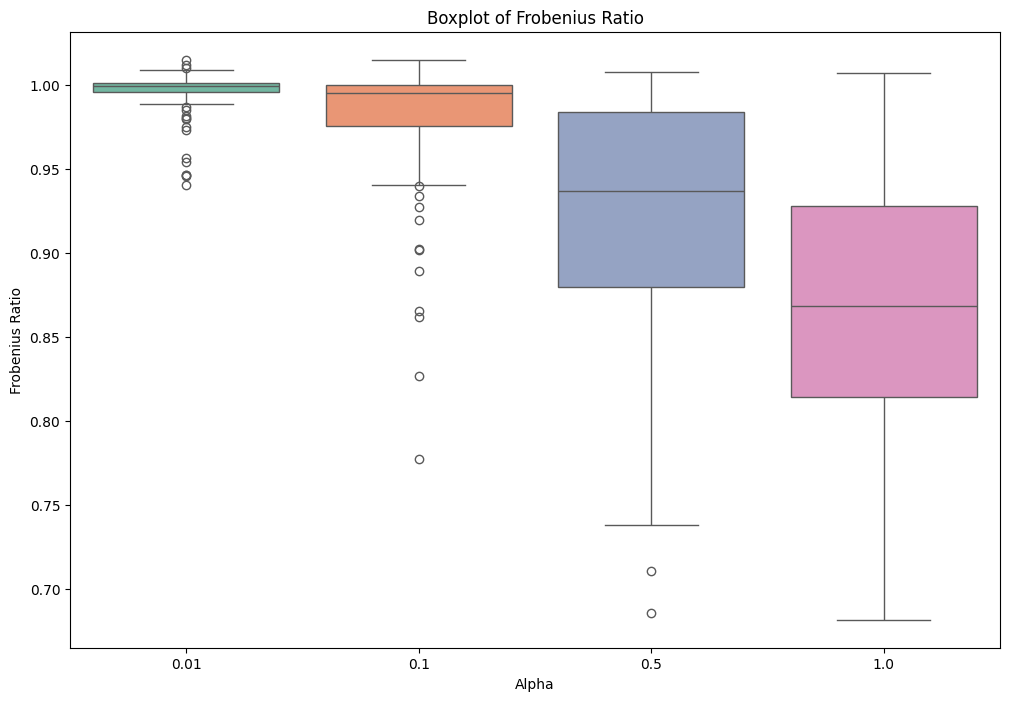

/var/folders/5_/8w_rvszs7q3_4ll2x7w6mrl80000gp/T/ipykernel_98602/141410722.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alpha', y=attribute, data=combined_df, palette='Set2')


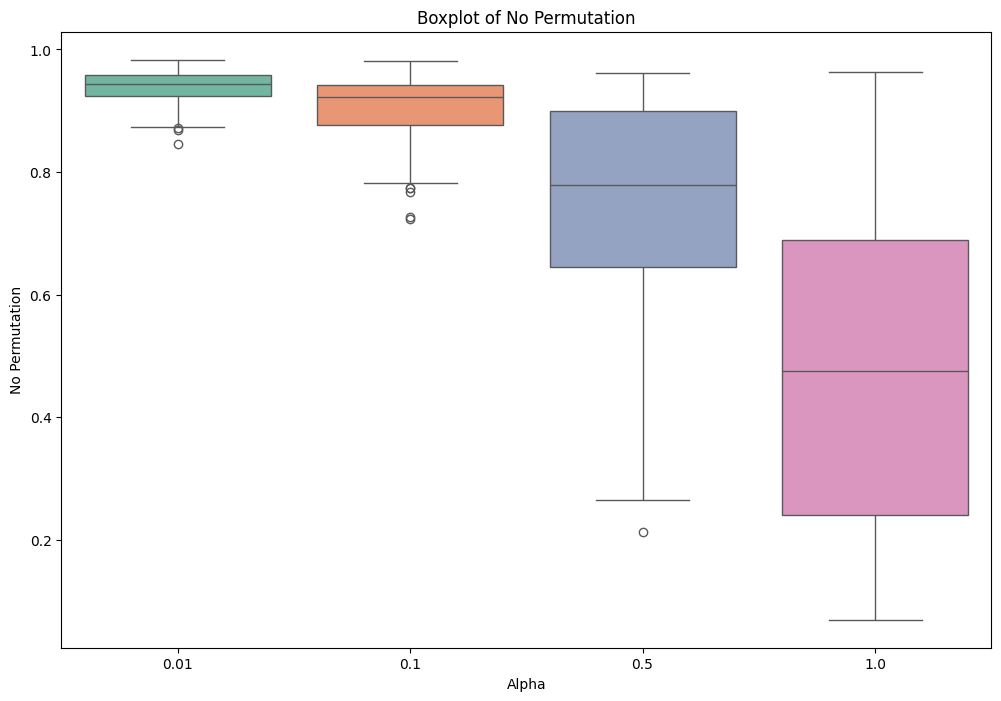

/var/folders/5_/8w_rvszs7q3_4ll2x7w6mrl80000gp/T/ipykernel_98602/141410722.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alpha', y=attribute, data=combined_df, palette='Set2')


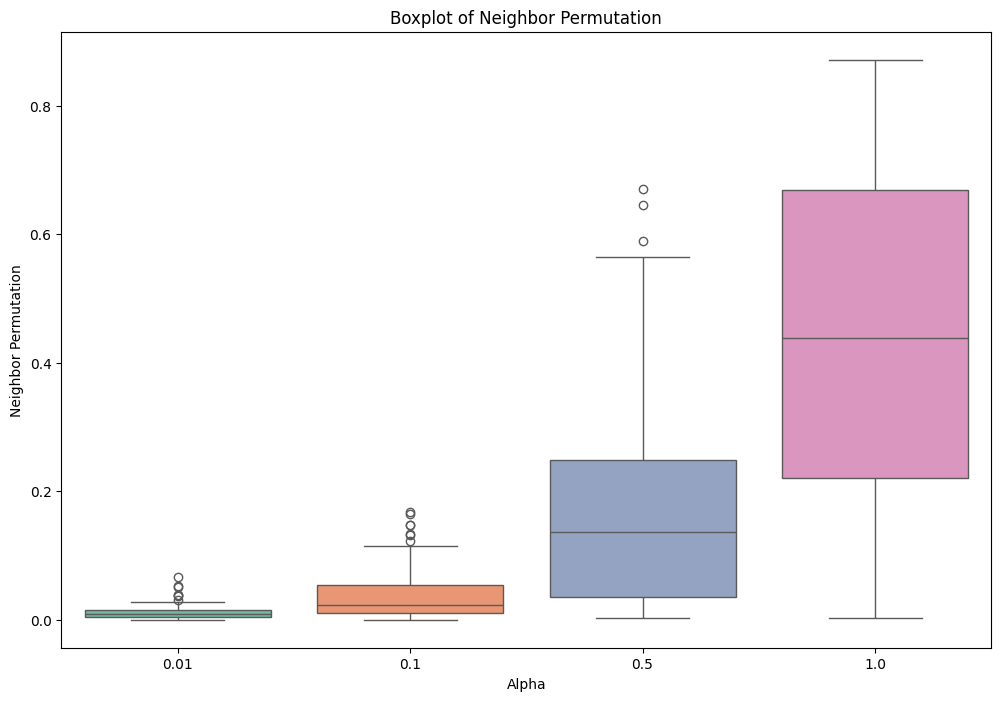

/var/folders/5_/8w_rvszs7q3_4ll2x7w6mrl80000gp/T/ipykernel_98602/141410722.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alpha', y=attribute, data=combined_df, palette='Set2')


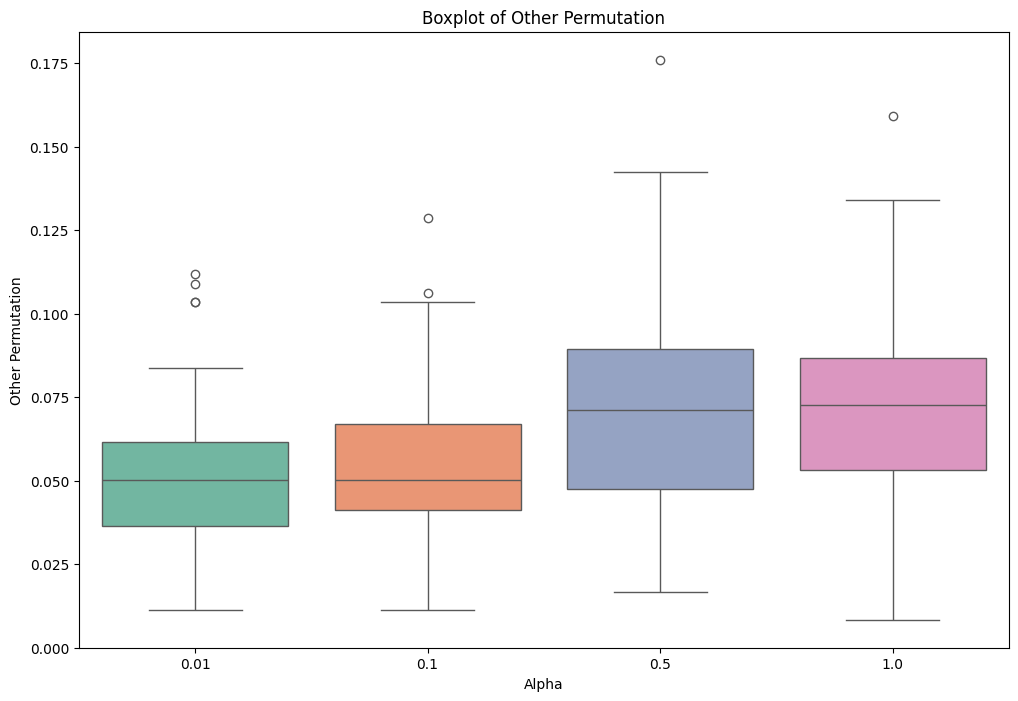

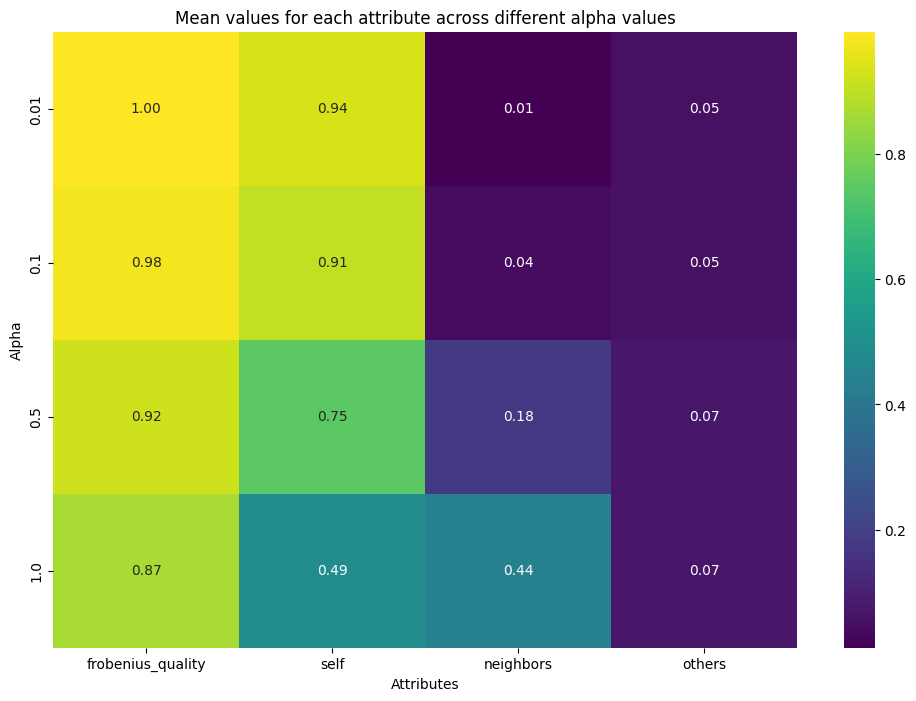

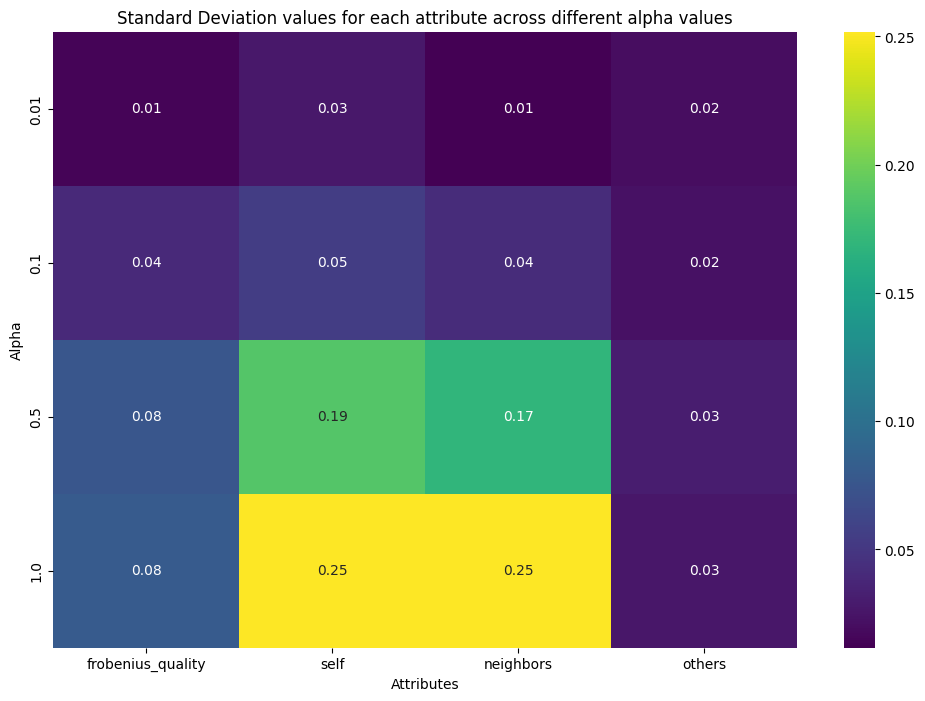

In [24]:
attributes = collated_results[0.01].columns[1:]
plot_boxplots_and_stats(collated_results, attributes)

/var/folders/5_/8w_rvszs7q3_4ll2x7w6mrl80000gp/T/ipykernel_98602/380182815.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alpha', y=attribute, data=combined_df, palette='Set2')


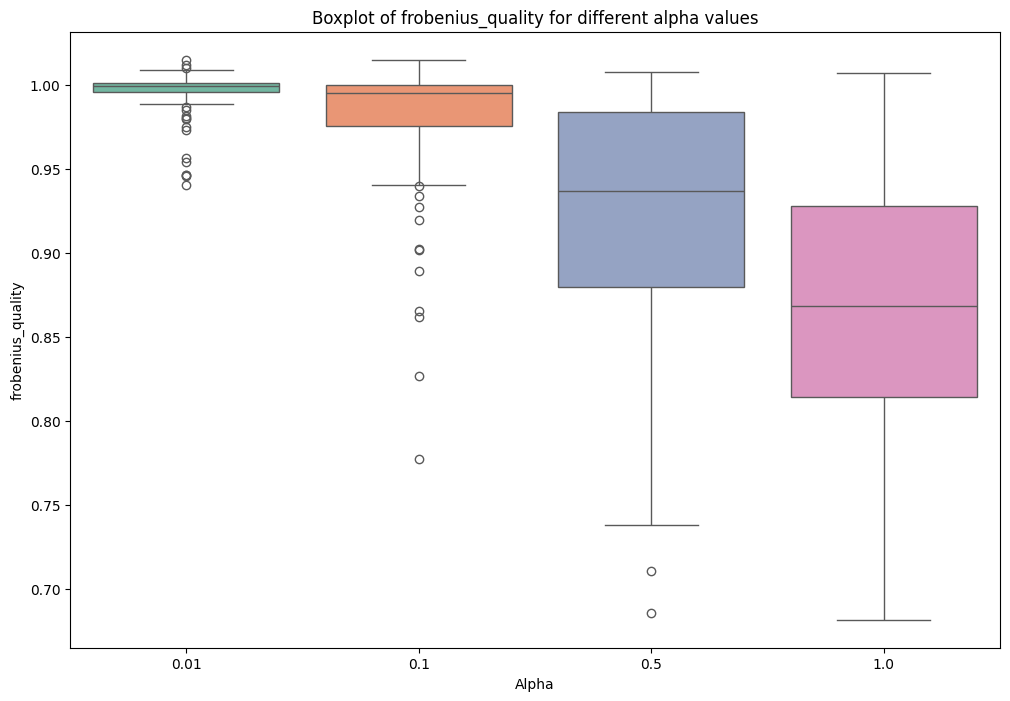

/var/folders/5_/8w_rvszs7q3_4ll2x7w6mrl80000gp/T/ipykernel_98602/380182815.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alpha', y=attribute, data=combined_df, palette='Set2')


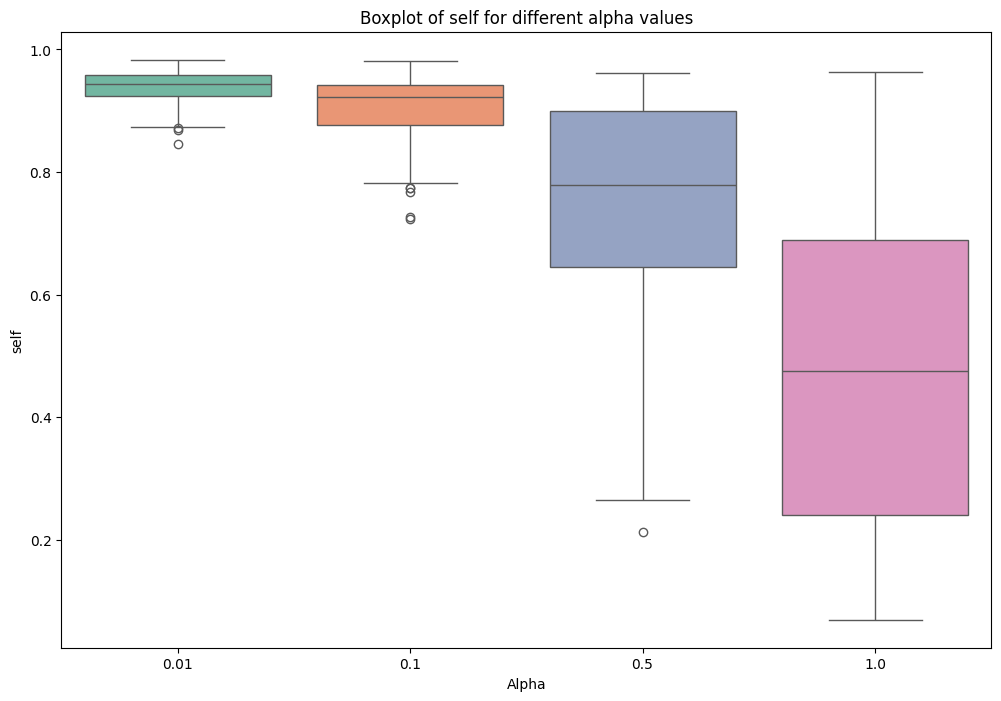

/var/folders/5_/8w_rvszs7q3_4ll2x7w6mrl80000gp/T/ipykernel_98602/380182815.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alpha', y=attribute, data=combined_df, palette='Set2')


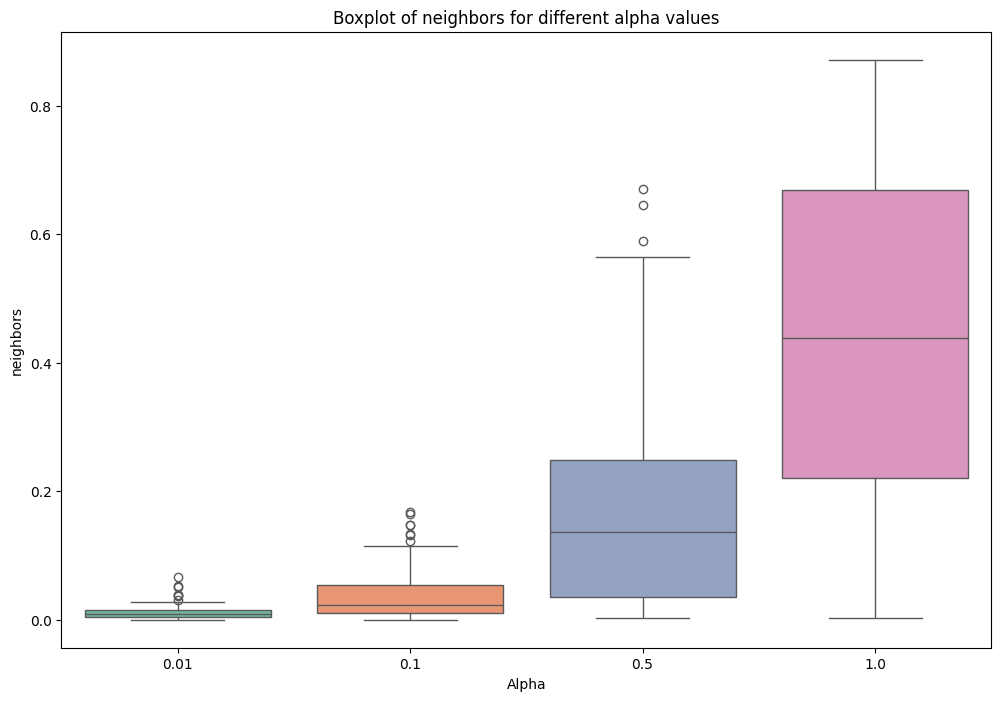

/var/folders/5_/8w_rvszs7q3_4ll2x7w6mrl80000gp/T/ipykernel_98602/380182815.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alpha', y=attribute, data=combined_df, palette='Set2')


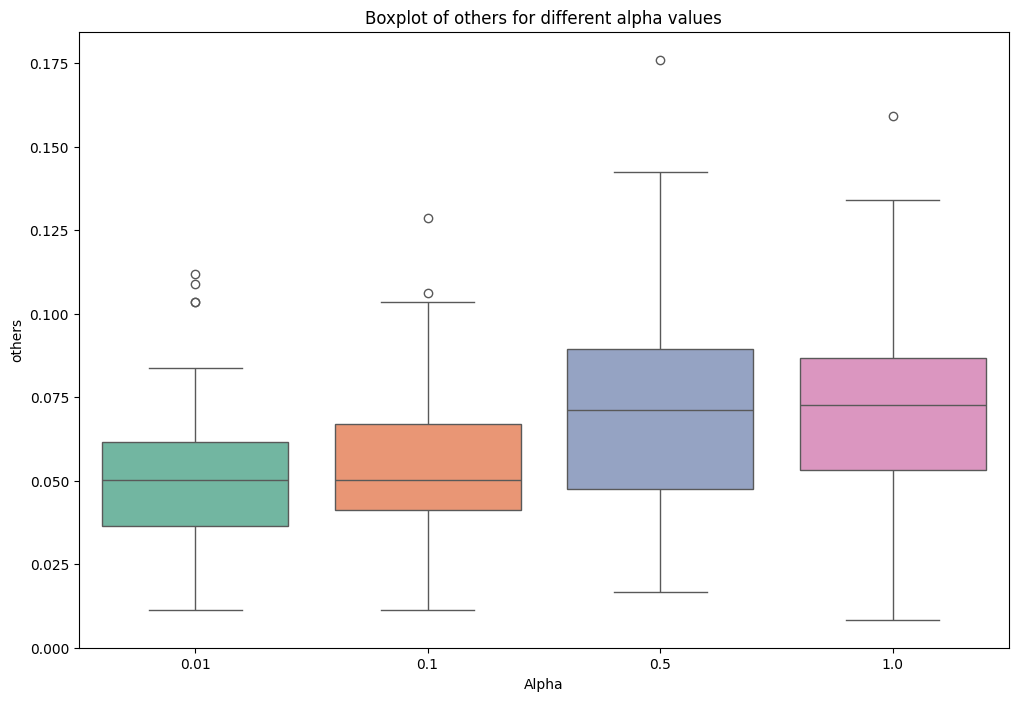

In [16]:
attributes = collated_results[0.01].columns[1:]
plot_boxplots_by_attribute(collated_results, attributes)